In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dados

In [5]:
# abrindo dados
df = pd.read_csv('../dados_meteorologicos/dataframe_ML_8unit.csv')

In [6]:
df.head()

,Unnamed: 0,t2_5km,usodosolo,elevacao,aspect,slope,ndvi,evi,t2_1km,aspect_LE,aspect_NS
0,71,293.861,2.0,530,138.04742,3.825599,7881,4294,292.852,0.983365,-0.181639
1,72,293.861,2.0,610,311.32670,3.327508,8178,3931,293.374,-0.952633,-0.304123
2,73,293.861,2.0,551,315.65450,15.256382,6945,4890,293.502,0.075479,0.997147
3,74,293.861,2.0,335,294.22177,14.086095,7983,6046,294.146,0.464312,-0.885671
4,75,295.679,2.0,434,267.82870,9.051502,7665,5841,295.056,-0.701476,-0.712693


In [7]:
df = df.drop(['Unnamed: 0','aspect'],axis=1)

In [8]:
# preparando os dados
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

In [9]:
bina = MultiLabelBinarizer()
usodosolo = bina.fit(df.usodosolo.values.reshape(-1,1)).transform(df.usodosolo.values.reshape(-1,1))

In [10]:
Y = df.t2_1km.values
X = df[['t2_5km','elevacao','ndvi','evi','slope','aspect_LE','aspect_NS']].values
stander = StandardScaler()
X = stander.fit(X).transform(X)
X = np.hstack((X,usodosolo))

# SVR cross validation

In [11]:
# test um
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

In [12]:
model = SVR()

In [13]:
cv_result = cross_validate(model,X, Y,scoring=('r2', 'neg_mean_squared_error'),
        cv=10,return_train_score= True)

In [14]:
cv_result['test_r2']

array([ 0.42005592,  0.40999826,  0.66674037,  0.75915076,  0.79233936,
        0.87582042,  0.65251282,  0.69436587,  0.44750835,  0.57339374])

In [15]:
resultado = pd.DataFrame.from_dict(cv_result)
resultado.to_csv('cross_vald.csv')

# Analisando

In [4]:
rs = pd.read_csv('cross_vald.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cb634e4a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f3cb61d3208>], dtype=object)

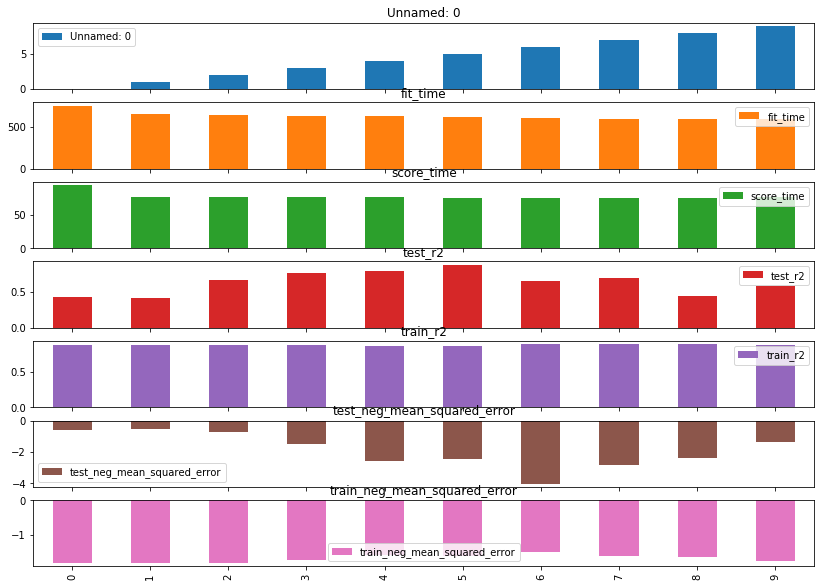

In [9]:
rs.plot.bar(subplots=True,figsize=(14,10))

In [11]:
rs.test_r2

0    0.420056
1    0.409998
2    0.666740
3    0.759151
4    0.792339
5    0.875820
6    0.652513
7    0.694366
8    0.447508
9    0.573394
Name: test_r2, dtype: float64